<h2>3<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ</h2>
<h3>Γενετικοί Αλγόριθμοι</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα εξοικειωθείτε με την χρήση των γενετικών αλγορίθμων και την επιλογή των παραμέτρων τους. Επιπλέον, θα αναπτύξετε ένα γενετικό αλγόριθμο για τον εντοπισμό κοινοτήτων σε πραγματικά δίκτυα και θα συγκρίνετε το αποτέλεσμά του με τους αλγόριθμους εντοπισμού κοινοτήτων που εφαρμόστηκαν στην 2<sup>η</sup> εργαστηριακή άσκηση.</p>

In [1]:
%matplotlib inline

import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

from scipy.integrate import odeint

### Άσκηση 1: Εξοικείωση με Γενετικούς Αλγόριθμους

#### Πρόβλημα ONEMAX

<p style=text-align:justify>Βρείτε την δυαδική ακολουθία $(x_1, x_2, ..., x_n)$ που μεγιστοποιεί το άθροισμα $x_1 + x_2 + ... + x_n, n=20$. Αναλύστε την επίδραση του μεγέθους του πληθυσμού, της πιθανότητας διασταύρωσης (crossover) και της πιθανότητας μετάλλαξης (mutation) στην ποιότητα της λύσης (πόσο κοντά είναι στην προφανή βέλτιστη λύση) που προκύπτει από το γενετικό αλγόριθμο. Συγκεκριμένα, μεταβάλλετε τον πληθυσμό από $10$ ως $100$ χρωμοσώματα με βήμα $10$,την πιθανότητα διασταύρωσης από $0.3$ ως $0.9$ με βήμα $0.1$ και την πιθανότητα μετάλλαξης από $0.01$ ως $0.2$ με βήμα $0.01$. Εξετάστε την ποιότητα της λύσης του γενετικού αλγορίθμου καθώς αλλάζετε τις παραμέτρους. Ελιτισμό μπορείτε να χρησιμοποιήσετε αν το επιθυμείτε.</p>

In [2]:
def create_population(size,n=20):
    genes = n
    population = np.random.randint(0, 2, (size,genes))
    return population

def find_fitness(population):
    fitness = np.empty([population.shape[0], 1])
    for i in range(population.shape[0]):
        fitness[i] = np.sum(population[i])
    return fitness

def proportional_selection(fitness):
    # Select chromosomes to pass to next population proportionally to their fitness
    total = np.sum(fitness)
    normalized = np.array([f/total for f in fitness])
    x=np.random.uniform(0, 1)
    i=0
    sunolo=normalized[0]
    while(i<normalized.shape[0] and x>sunolo):
        i=i+1
        sunolo=sunolo+normalized[i]
    return i

def crossover(par1,par2):
    # Apply crossover to population
    pos = np.random.randint(0, len(par1))
    offs_1 = par1[:pos]
    offs_1 = np.append(offs_1, par2[pos:])
    offs_2 = par2[:pos]
    offs_2 = np.append(offs_2, par1[pos:])
    return (offs_1, offs_2)

def mutation(offsp,m_prob):
    # Apply mutation to population
    for position in range(len(offsp)):
        prop = round(np.random.uniform(0.0, 1.0), 2)
        if (prop < m_prob):
            offsp[position]= 1 - offsp[position]
    return offsp

def genetic_algorithm(population, cross_prob, mut_prob, generations=10):
    pop = create_population(population)
    for g in range(generations):
        fitness = find_fitness(pop)
        next_generation = np.empty_like(pop)
        for i in range(0, population, 2):
            first=proportional_selection(fitness)
            parent_1 = pop[first]
            pop=np.delete(pop, first,axis=0)
            fitness=np.delete(fitness, first)
            
            second=proportional_selection(fitness)
            parent_2 = pop[second]
            pop=np.delete(pop, second,axis=0)
            fitness=np.delete(fitness, second)
            cross_random = round(np.random.uniform(0.0, 1.0), 2)
            
            if (cross_random < cross_prob):
                off_1, off_2 = crossover(parent_1, parent_2)
            
                next_generation[i] = mutation(off_1, mut_prob)
                next_generation[i+1] = mutation(off_2, mut_prob)
            
            else:
                next_generation[i] = mutation(parent_1, mut_prob)
                next_generation[i+1] = mutation(parent_2, mut_prob)
        
        pop = next_generation
    fitn = find_fitness(pop)
    return fitn.max()

In [3]:
def genetic():
    best = 0
    for population in range(10, 110, 10):
        print("Population = ",population)
        for cross in np.arange(0.3, 1, 0.1):
            for mut in np.arange(0.01, 0.21, 0.01):
                val = genetic_algorithm(population, cross, mut)
                if val > best:
                    best = val
                    print("Population: %d, crossover probability: %f, mutation probability: %f, Result: %d" % (population, cross, mut, val))
                    if best==20: return
genetic()  

Population =  10
Population: 10, crossover probability: 0.300000, mutation probability: 0.010000, Result: 14
Population: 10, crossover probability: 0.300000, mutation probability: 0.120000, Result: 15
Population: 10, crossover probability: 0.400000, mutation probability: 0.070000, Result: 17
Population =  20
Population: 20, crossover probability: 0.300000, mutation probability: 0.080000, Result: 18
Population =  30
Population =  40
Population =  50
Population =  60
Population =  70
Population: 70, crossover probability: 0.300000, mutation probability: 0.180000, Result: 19
Population =  80
Population =  90


<ipython-input-2-f6165fb0043d>:15: RuntimeWarning: invalid value encountered in double_scalars
  normalized = np.array([f/total for f in fitness])


Population =  100


Εξετάσαμε 2 υλοποιήσεις, η πρώτη υλοποίηση σχεδιάστηκε έτσι ώστε όταν επιλεχθεί ένα χρωμόσωμα από την ρουλέτα να αφαιρείται απο την επόμενη ρουλέτα και η δεύτερη υλοποίηση με τέτοιο τρόπο ώστε να μην αφαίρειται. Το συμπέρασμα που βγάλαμε μετά από αρκετές υλοποιήσεις είναι ότι η δεύτερη προσέγγιση έβγαλε καλύτερα αποτελέσματα καθώς πάντοτε είχε την τελική τιμή 20 ενώ η πρώτη προσέγγιση όχι πάντοτε

### Άσκηση 2: Εντοπισμός Κοινοτήτων σε Γράφους Κοινωνικών Δικτύων με Χρήση Γενετικών Αλγορίθμων

<p style=text-align:justify>Στην παρούσα άσκηση θα αναπτύξετε κώδικα για εντοπισμό κοινοτήτων σε γράφους δικτύων με χρήση γενετικών αλγορίθμων. Ακολούθως θα εφαρμόσετε το γενετικό αλγόριθμο για τον εντοπισμό κοινοτήτων σε πραγματικά δίκτυα και θα συγκρίνετε το αποτέλεσμά του με εκείνο των αλγορίθμων της δεύτερης εργαστηριακής άσκησης χρησιμοποιώντας τη μετρική modularity.</p>

##### Αναπαράσταση υποψήφιων λύσεων (χρωμοσωμάτων)
<p style=text-align:justify>Κάθε χρωμόσωμα $b_{i,t}$ του πληθυσμού τη χρονική στιγμή $t$ είναι ένα διάνυσμα με μήκος ίσο με το πλήθος των κόμβων του δικτύου, $n$. Αν $b_{i,t}(j)=d$ τότε οι κόμβοι $j,d$ ανήκουν στην ίδια κοινότητα. Επιπλέον για να ισχύει $b_{i,t}(j)=d$ , οι κόμβοι $j,d$ θα πρέπει να συνδέονται στην αρχική τοπολογία. Τότε, βρίσκοντας τις συνδεδεμένες συνιστώσες του χρωμοσώματος $b_{i,t}$ , προκύπτουν οι κοινότητες του δικτύου.</p>

##### Αρχικοποίηση
<p style=text-align:justify>Η αρχική γενιά του πληθυσμού θα πρέπει να αποτελείται από χρωμοσώματα τα οποία θα είναι τυχαία επιλεγμένα και διορθωμένα ώστε ο αριθμός που υπάρχει σε κάθε θέση να είναι γείτονας του αντίστοιχου κόμβου. (Αν δεν ισχύει θα πρέπει να αντικατασταθεί από ένα γείτονα του αντίστοιχου κόμβου.) Θεωρείστε πληθυσμό $300$ χρωμοσωμάτων.</p>

##### Συνάρτηση Fitness
<p style=text-align:justify>Η συνάρτηση fitness υπολογίζεται όπως στις διαφάνειες 28 και 29 της αντίστοιχης διάλεξης του μαθήματος. Προσοχή για κάθε συνιστώσα (component) του γράφου θα πρέπει να βρίσκετε τον αντίστοιχο υπογράφο.</p>

##### Επιλογή (Selection)
<p style=text-align:justify>Η επιλογή χρωμοσωμάτων από μία γενιά του πληθυσμού για την κατασκευή της επόμενης γενιάς γίνεται με τη μέθοδο της ρουλέτας (διαφάνειες μαθήματος και αλγόριθμος). Τροποποιήστε τον παραπάνω αλγόριθμο ώστε να εφαρμόσετε και ελιτισμό, δηλαδή τα $x$ πρώτα χρωμοσώματα της νέας γενιάς θα είναι εκείνα τα χρωμοσώματα της προηγούμενης γενιάς που έχουν επιτύχει τη μέγιστη τιμή της συνάρτησης fitness.</p>

##### Διασταύρωση (Crossover)
<p style=text-align:justify>Η διασταύρωση πραγματοποιείται όπως περιγράφεται στον αλγόριθμο, μεταξύ διαδοχικών χρωμοσωμάτων της εκάστοτε γενιάς. Η πιθανότητα διασταύρωσης ανά ζεύγος είναι ίση με $p_C$.</p>

##### Μετάλλαξη (Mutation)
<p style=text-align:justify>Η μετάλλαξη πραγματοποιείται σε κάθε θέση του χρωμοσώματος με πιθανότητα $p_M$, όπως στον αλγόριθμο. Θα πρέπει ωστόσο ο αλγόριθμος να τροποποιηθεί ώστε να δίνει ένα τυχαίο γείτονα του κόμβου που αντιστοιχεί σε κάθε θέση ως αποτέλεσμα της μετάλλαξης.</p>

##### Κριτήριο Τερματισμού (Stopping Criterion)
<p style=text-align:justify>Ως κριτήριο τερματισμού ορίστε ένα μέγιστο πλήθος επαναλήψεων εφαρμογής του αλγορίθμου (γενεών πληθυσμού), ίσο με $30$, ή ότι η βέλτιστη τιμή της συνάρτησης fitness δεν έχει μεταβληθεί για τις τελευταίες $5$ επαναλήψεις. Εφαρμόστε τον παραπάνω γενετικό αλγόριθμο στις πραγματικές τοπολογίες της δεύτερης εργαστηριακής άσκησης που δίνονται και στον Πίνακα 1. Οι παράμετροι που θα πρέπει να εξεταστούν δίνονται στον παρακάτω πίνακα. Προσοχή θα πρέπει να εξεταστούν όλοι οι συνδυασμοί.</p>

<table style=width:100%>
<tr>
    <th style=text-align:left>Παράμετρος</th>
    <th style=text-align:left>Τιμές</th>
</tr>
<tr>
    <td style=text-align:left>Διαστάυρωση $p_C$</td>
    <td style=text-align:left>$0.7:0.9$ με βήμα $0.1$</td>
</tr>
<tr>
    <td style=text-align:left>Μετάλλαξη $p_M$</td>
    <td style=text-align:left>$\{0.1,0.2\}$</td>
</tr>
<tr>
    <td style=text-align:left>Ελιτισμός $x$</td>
    <td style=text-align:left>$1:3$ με βήμα $1$</td>
</tr>
</table>

<p style=text-align:justify>Συγκρίνετε το αποτέλεσμα του γενετικού αλγορίθμου (το καλύτερο για τις διάφορες επιλογές παραμέτρων) με εκείνο των αλγορίθμων εντοπισμού κοινοτήτων της εργαστηριακής άσκησης 2 (δίνονται και στον Πίνακα 2), υπολογίζοντας το modularity. Θα πρέπει να έχετε πρωτίστως μετατρέψει το αποτέλεσμα του γενετικού αλγορίθμου σε κατάλληλη μορφη πάνω στο χρωμόσωμα που επιτυγχάνει τη βέλτιστη τιμή της συνάρτησης fitness.</p>


In [73]:
football_gml = nx.read_gml("./football.gml")
lesmis_gml = nx.read_gml("./lesmis.gml")
dolphins_gml = nx.read_gml("./dolphins.gml")

def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G, first_label=start_value)
    G_mapping = dict(enumerate(G.nodes,0))
    return nG,G_mapping

football, football_map = conv2int(football_gml,0)
lesmis, lesmis_map = conv2int(lesmis_gml,0)
dolphins, dolphins_map = conv2int(dolphins_gml,0)

In [63]:
def create_population(G, population_size=300):
    # Create the initial population
    
    population = []
    for c in range(population_size):
        chromosomes = [] 
        for n in range(G.number_of_nodes()):
            neighbors = list(G[n]) 
            chromosomes.append(np.random.choice(neighbors))
        population.append(chromosomes)
    return np.array(population)

def find_fitness(chromosome, G, r=2):
   
    Connected_G = nx.Graph()
    adj_mtrx = nx.convert_matrix.to_numpy_matrix(G)
    for i in range(len(chromosome)):
        Connected_G.add_edge(i, chromosome[i])
    
    partitioning = nx.connected_components(Connected_G) 
    
    partitioning = [list(s) for s in partitioning]
    
    
    # initialize CS to 0
    CS = 0
    
    # for each connected component
    for S in partitioning:
        volume = 0
        for i in S:
            for j in S:
                volume = volume + adj_mtrx[i,j] 

        I = adj_mtrx[S]
        len_J = len_I = len(S) 
         
        a_i_J = np.array([np.sum(I[i])/len_J for i in range(len(I)) if i in S])

        # We will calculate M below
        M_S = np.sum(np.power(a_i_J, r))/len_I
        
        Q_S = M_S * volume
        CS = CS + Q_S
    return CS

def proportional_selection(fitness):
    # Select chromosomes to pass to next population proportionally to their fitness
    total = np.sum(fitness)
    #print(len(fitness))
    normalized = np.array([f/total for f in fitness])
    x = np.random.uniform(0, 1)
    sunolo=normalized[0]
    i=0
    while(i<normalized.shape[0] and x>sunolo):
        i=i+1
        sunolo=sunolo+normalized[i]
    return i

def crossover(parent1, parent2):
    # Apply crossover to population
    offs = []
    for i in range(len(parent1)):
        mask = np.random.randint(0,1)
        if mask == 0:
            offs.append(parent2[i])
        else:
            offs.append(parent1[i])
    return offs

def mutation(offs, G, m_pro):
    # Apply mutation to population
    mutant = offs
    for position in range(len(mutant)):
        prop = round(np.random.uniform(0.0, 1.0), 2)
        if (prop < m_pro):
            cand_neighbors = list(G[position])
            mutant[position] = np.random.choice(cand_neighbors)
    
    return mutant


def genetic_algorithm(G, x, pc, pm, population_size=300, generations = 30):
    # Main genetic algorithm
    # G: Graph we are testing
    # x: Elitism value
    # pc: Crossover probability
    # pm: Mutation probability
    
    # Create the population
    population = create_population(G, population_size)

    
    best_fitness = 0
    counter = 0
    next_generation = np.empty_like(population)

    
    for g in range(generations):
        
        best_generation_fitness = 0

        #Fitness
        fitness = []
        for i in range(population_size):
            fit = find_fitness(population[i], G)
            fitness.append(fit)
        fitness = np.array(fitness)
        # Sort
        sorted_indexes = np.argsort(fitness)
        best_generation_fitness = fitness[sorted_indexes[-1]]
        population_sorted = population[sorted_indexes]

        # Termination
        if best_generation_fitness > best_fitness:
            counter = 0
            best_fitness = best_generation_fitness
            best_chromosome = population_sorted[-1]
        else:
            counter = counter + 1
    
        if counter > 5:
            break

        # Elitism 
        next_generation[:x] = population_sorted[-x:]
        # New generation from X to Population_Size
        for s in range(x, population_size):
            
            first=proportional_selection(fitness)
            parent_1 = population[first]
            population=np.delete(population, first,axis=0)
            fitness=np.delete(fitness, first)
            
            second=proportional_selection(fitness)
            parent_2 = population[second]
            #population=np.delete(population, second,axis=0)
            #fitness=np.delete(fitness, second)

            
            prob = round(np.random.uniform(0.0, 1.0), 2)

            # Check if number smaller than crossover probability, do crossover
            if (prob < pc): 
                offspring = crossover(parent_1, parent_2)
                offspring = mutation(offspring, G, pm)
                next_generation[s] = offspring

            else:
                # pick randomly one of the two parents to continue
                pick = np.random.uniform(0, 1)
                if pick == 0:
                    next_generation[s] = parent_1
                else:
                    next_generation[s] = parent_2
        
        population = next_generation
    return (best_fitness, best_chromosome)

In [61]:
best_fitness_football = 0
for pc in np.linspace(0.7, 0.9, 3):
    for pm in [0.1, 0.2]:
        for x in range(1,4):
            fitn,  chromosome = genetic_algorithm(football, x, pc, pm)
            print("Crossover Probablity: %f, Mutation Probability: %f Elitism: %d, Fitness: %f" % (pc, pm, x, fitn))
            if best_fitness_football < fitn:
                best_chromosome_football = chromosome
                best_fitness_football = fitn

<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
Crossover Probablity: 0.700000, Mutation Probability: 0.100000 Elitism: 1, Fitness: 111.545550
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
Crossover Probablity: 0.700000, Mutation Probability: 0.100000 Elitism: 2, Fitness: 98.726673
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function len>
<built-in function 

In [64]:
best_fitness_lesmis = 0
for pc in np.linspace(0.7, 0.9, 3):
    for pm in [0.1, 0.2]:
        for x in range(1,4):
            fitn,  chromosome = genetic_algorithm(lesmis, x, pc, pm)
            print("Crossover Probablity: %f, Mutation Probability: %f Elitism: %d, Fitness: %f" % (pc, pm, x, fitn))
            if best_fitness_lesmis < fitn:
                best_chromosome_lesmis = chromosome
                best_fitness_lesmis = fitn

Crossover Probablity: 0.700000, Mutation Probability: 0.100000 Elitism: 1, Fitness: 33.484516
Crossover Probablity: 0.700000, Mutation Probability: 0.100000 Elitism: 2, Fitness: 56.751853
Crossover Probablity: 0.700000, Mutation Probability: 0.100000 Elitism: 3, Fitness: 39.336829
Crossover Probablity: 0.700000, Mutation Probability: 0.200000 Elitism: 1, Fitness: 32.761094
Crossover Probablity: 0.700000, Mutation Probability: 0.200000 Elitism: 2, Fitness: 33.445511
Crossover Probablity: 0.700000, Mutation Probability: 0.200000 Elitism: 3, Fitness: 37.851369
Crossover Probablity: 0.800000, Mutation Probability: 0.100000 Elitism: 1, Fitness: 40.659635
Crossover Probablity: 0.800000, Mutation Probability: 0.100000 Elitism: 2, Fitness: 34.082942
Crossover Probablity: 0.800000, Mutation Probability: 0.100000 Elitism: 3, Fitness: 45.167330
Crossover Probablity: 0.800000, Mutation Probability: 0.200000 Elitism: 1, Fitness: 32.295313
Crossover Probablity: 0.800000, Mutation Probability: 0.2000

In [65]:
best_fitness_dolphins = 0
for pc in np.linspace(0.7, 0.9, 3):
    for pm in [0.1, 0.2]:
        for x in range(1,4):
            fitn,  chromosome = genetic_algorithm(dolphins, x, pc, pm)
            print("Crossover Probablity: %f, Mutation Probability: %f Elitism: %d, Fitness: %f" % (pc, pm, x, fitn))
            if best_fitness_dolphins < fitn:
                best_chromosome_dolphins = chromosome
                best_fitness_dolphins = fitn         

Crossover Probablity: 0.700000, Mutation Probability: 0.100000 Elitism: 1, Fitness: 36.675966
Crossover Probablity: 0.700000, Mutation Probability: 0.100000 Elitism: 2, Fitness: 27.642339
Crossover Probablity: 0.700000, Mutation Probability: 0.100000 Elitism: 3, Fitness: 38.820120
Crossover Probablity: 0.700000, Mutation Probability: 0.200000 Elitism: 1, Fitness: 34.284693
Crossover Probablity: 0.700000, Mutation Probability: 0.200000 Elitism: 2, Fitness: 42.462365
Crossover Probablity: 0.700000, Mutation Probability: 0.200000 Elitism: 3, Fitness: 33.601132
Crossover Probablity: 0.800000, Mutation Probability: 0.100000 Elitism: 1, Fitness: 36.113914
Crossover Probablity: 0.800000, Mutation Probability: 0.100000 Elitism: 2, Fitness: 32.476016
Crossover Probablity: 0.800000, Mutation Probability: 0.100000 Elitism: 3, Fitness: 37.219175
Crossover Probablity: 0.800000, Mutation Probability: 0.200000 Elitism: 1, Fitness: 35.920716
Crossover Probablity: 0.800000, Mutation Probability: 0.2000

In [66]:
# modularity for GA community detection algorithm 
def compute_modularity(G,G_results):
    new_G = nx.Graph()
    
    for i in range(len(G_results)):
        new_G.add_edge(i, G_results[i])
        
    k = nx.number_connected_components(new_G) # number of connected components
    partitioning = tuple(nx.connected_components(new_G)) # connected components
    
    mod = nx.algorithms.community.quality.performance(G, partitioning)
    return mod, k


In [67]:
football_ga_mod, football_k = compute_modularity(football, best_chromosome_football)
dolphins_ga_mod, dolphins_k = compute_modularity(dolphins, best_chromosome_dolphins)
lesmis_ga_mod, lesmis_k = compute_modularity(lesmis, best_chromosome_lesmis)

#### Σχόλια για τα αποτελέσματα του γενετικού αλγόριθμου ανάλογα με τις τιμές των παραμέτρων

Σύμφωνα με τις τελικές τιμές των fitness, βλέπουμε ότι τα μέγιστα αποτελέσματα τα έχουμε για :
    
    - Crossover Probablity: 0.900000, Mutation Probability: 0.200000 Elitism: 3, Fitness: 139.982267
    - Crossover Probablity: 0.700000, Mutation Probability: 0.100000 Elitism: 2, Fitness: 56.751853
    - Crossover Probablity: 0.700000, Mutation Probability: 0.200000 Elitism: 2, Fitness: 42.462365
 
Βλέπουμε ότι δεν έχουμε κάποιο μοτίβο για τις παραμέτρους μας για να σχολιάσουμε. Σημαντικό ρόλο έχει και η αρχικοποίηση του πληθυσμού καθώς αυτή η τυχαιότητα μπορεί να κρίνει αρκετά το τελικό αποτέλεσμα.

### Find the best partition with Girvan-Newman, Spectral Clustering and Modularity Maximization
<p style=text-align:justify>Aποτέλεσματα των αλγορίθμων της δεύτερης εργαστηριακής άσκησης (με προτεινόμενη υλοποίηση).</p>

In [68]:
import itertools

# Girvan_newman:partitions of at most k communities, select the one with the highest value of modularity.
def comd_GN(G,k):
    gn_G = nx.algorithms.community.centrality.girvan_newman(G)
    limited = itertools.takewhile(lambda c: len(c) <= k, gn_G)
    per_G = []
    com_G = []
    for communities in limited:
        per = nx.algorithms.community.quality.modularity(G,communities)
        per_G.append(per) #list of performance of each partition
        com_G.append(communities) # list of partitions
    max_mod_G = max(per_G) # maximum modularity value
    index_G = per_G.index(max(per_G)) # index of maximum modularity
    best_G = com_G[index_G] # the partition of maximum modularity  
    num_best_G = len(best_G)
    return best_G, max_mod_G, num_best_G

GN_best_football, GN_mod_football, GN_num_football = comd_GN(football,50)
GN_best_lesmis, GN_mod_lesmis, GN_num_lesmis = comd_GN(lesmis,50)
GN_best_dolphins, GN_mod_dolphins, GN_num_dolphins = comd_GN(dolphins,50)

In [69]:
from sklearn.cluster import SpectralClustering

# Spectral Clustering
def comd_SP(G,k):
    mG = np.array(nx.to_numpy_matrix(G))
    clustering = SpectralClustering(n_clusters=k,random_state=0, affinity='precomputed').fit(mG)
    clabels = clustering.labels_
    numc = clustering.n_clusters
    b = dict(enumerate(clabels,0)) # create a mapping of nodes indices to the community it belongs
    d = [] # a list of all communities (each list is a community)
    for i in range(0,numc):
        d.append([k for k,v in b.items() if float(v) == i])
    per = nx.algorithms.community.quality.modularity(G,d)
    return d, per, numc

def find_best_SP_partition(G,k):
    com = []
    com_mod = []
    com_num = []
    for i in range(2,k):
        tcom,tcom_mod,tcom_num = comd_SP(G,i)
        com.append(tcom)
        com_mod.append(tcom_mod)
        com_num.append(tcom_num)
    index = com_mod.index(max(com_mod))
    G_SP = com[index]
    G_SP_mod = com_mod[index]
    G_SP_num = com_num[index]
    return G_SP, G_SP_mod, G_SP_num

football_SP, football_SP_mod, football_SP_num = find_best_SP_partition(football,50) 
lesmis_SP, lesmis_SP_mod, lesmis_SP_num = find_best_SP_partition(lesmis,50)  
dolphins_SP, dolphins_SP_mod, dolphins_SP_num = find_best_SP_partition(dolphins,50)

In [70]:
# Modularity Maximization
def comd_MM(G):
    c = list(nx.algorithms.community.modularity_max.greedy_modularity_communities(G))
    mm_G = []
    for i,j in enumerate(c):
        a = list(j)
        mm_G.append(a)
    per = nx.algorithms.community.quality.modularity(G,mm_G)
    num_G = len(mm_G)
    return mm_G, per,num_G

football_MM, football_MM_mod, football_MM_num = comd_MM(football)
lesmis_MM, lesmis_MM_mod, lesmis_MM_num = comd_MM(lesmis)  
dolphins_MM, dolphins_MM_mod, dolphins_MM_num = comd_MM(dolphins)

### Compare best modularity scores for all algorithms

In [71]:
# Compare results 
print ("American College Football")
print ("Girvan-Newman: %r communities with modularity score %r" %(GN_num_football, GN_mod_football))
print ("Spectral Clustering: %r communities with modularity score %r" %(football_SP_num, football_SP_mod))
print ("Modularity Maximization: %r communities with modularity score %r" %(football_MM_num, football_MM_mod))
print ("Genetic Algorithm: %r communities with modularity score %r" %(football_k, football_ga_mod))
print()
print ("Les Miserables")
print ("Girvan-Newman: %r communities with modularity score %r" %(GN_num_lesmis, GN_mod_lesmis))
print ("Spectral Clustering: %r communities with modularity score %r" %(lesmis_SP_num, lesmis_SP_mod))
print ("Modularity Maximization: %r communities with modularity score %r" %(lesmis_MM_num, lesmis_MM_mod))
print ("Genetic Algorithm: %r communities with modularity score %r"%(lesmis_k, lesmis_ga_mod))
print()
print ("Dolphins")
print ("Girvan-Newman: %r communities with modularity score %r" %(GN_num_dolphins, GN_mod_dolphins))
print ("Spectral Clustering: %r communities with modularity score %r" %(dolphins_SP_num, dolphins_SP_mod))
print ("Modularity Maximization: %r communities with modularity score %r" %(dolphins_MM_num, dolphins_MM_mod))
print ("Genetic Algorithm: %r communities with modularity score %r" %(dolphins_k, dolphins_ga_mod))

American College Football
Girvan-Newman: 10 communities with modularity score 0.5996290274077957
Spectral Clustering: 11 communities with modularity score 0.6022010863056824
Modularity Maximization: 6 communities with modularity score 0.5497406651426807
Genetic Algorithm: 8 communities with modularity score 0.8013729977116705

Les Miserables
Girvan-Newman: 11 communities with modularity score 0.5380680761361523
Spectral Clustering: 7 communities with modularity score 0.5382230764461529
Modularity Maximization: 5 communities with modularity score 0.5005967511935024
Genetic Algorithm: 8 communities with modularity score 0.7665755297334245

Dolphins
Girvan-Newman: 5 communities with modularity score 0.5193821446936434
Spectral Clustering: 6 communities with modularity score 0.49497646453858624
Modularity Maximization: 4 communities with modularity score 0.4954906847039278
Genetic Algorithm: 10 communities with modularity score 0.8625066102591221


#### Σχόλια για τα αποτελέσματα του γενετικού αλγόριθμου συγκριτικά με τους άλλους

Αρχικά να σχολιάσουμε ότι τα αποτελέσματα των προτεινόμενων υλοποιήσεων των αλγορίθμων είναι παρόμοια με τα αποτελέσματα που είχαμε στις δικές μα υλοποιήσεις του Εργαστηρίου 2.

Στη συνέχεια έχουμε εντυπωσιακά αποτελέσματα του γενετικού αλγορίθμου μας. Τα αποτελέσματα είναι πολύ καλύτερα (στο σημείο που μας κάνει να υποπτευόμαστε για πιθανό λάθος).

Απότι φαίνεται οι greedy προσεγγίσεις΄και οι περιορισμοί των μη γενετικων αλγορίθμων δεν καλύπτουν αρκετό εύρος λύσεων και καταλήγουν σε κάποιο τοπικό μέγιστο και όχι ολικό. 

Παρακάτων παραθέτουμε τις κοινότητες που δημιουργήθηκαν στον γράφο lesmis για πληρότητα.

Best fitness was 56.751853


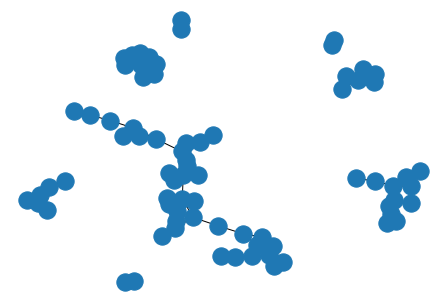

In [72]:
new_G = nx.Graph()
for i in range(len(best_chromosome_lesmis)):
    new_G.add_edge(i, best_chromosome_lesmis[i])
plt.figure()
nx.draw(new_G)

## ΜΕΡΟΣ Β

Σε αυτό το μέρος θα επικεντρωθείτε στην αριθμητική επίλυση των βασικών επιδημιολογικών μοντέλων SIR και SIS: <a style="text-decoration:none" href=https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model>αριθμητική επίλυση συστημάτων διαφορικών εξισώσεων με scipy</a></p>

#### Άσκηση 1: SIR

Το SIR μοντέλο δίνεται από το ακόλουθο διαγραμμα μεταβάσεων καταστάσεων

![title](img/SIR.png)

και περιγράφεται από το σύνολο διαφορικών εξισώσεων

$\frac{dS}{dt} = -\frac{\beta S I}{N}$

$\frac{dI}{dt} = \frac{\beta S I}{N} - \gamma I$

$\frac{dR}{dt} = \gamma I$

Για τις παραμέτρους που φαίνονται στον ακόλουθο Πίνακα 3, να δείξετε σε κοινό διάγραμμα για κάθε συνδυασμό παραμέτρων, τα $S(t)$,$I(t)$,$R(t)$.Τι παρατηρείτε; Σχολιάστε τα αποτελέσματα σε σχέση με το βασικό ρυθμό αναπαραγωγής $R_0$.

<table style=width:60%>
<tr>
    <th style=text-align:center>Παράμετροι</th>
    <th style=text-align:center colspan='6'>Τιμές</th>
</tr>
<tr>
    <td style=text-align:center>$\beta$</td>
     <td style=text-align:center colspan='6'>$10^{-3}$</td>
</tr>
<tr>
    <td style=text-align:center>$\gamma$</td>
    <td style=text-align:center>$10^{-6}$</td>
    <td style=text-align:center>$10^{-5}$</td>
    <td style=text-align:center>$10^{-4}$</td>
    <td style=text-align:center>$10^{-3}$</td>
    <td style=text-align:center>$10^{-2}$</td>
    <td style=text-align:center>$10^{-1}$</td>
</tr>
<tr>
    <td style=text-align:center>$S(0)$</td>
    <td style=text-align:center colspan='6'>$570$</td>
</tr>
<tr>
    <td style=text-align:center>$I(0)$</td>
    <td style=text-align:center colspan='6'>$17$</td>
</tr>
    <tr>
    <td style=text-align:center>$R(0)$</td>
    <td style=text-align:center colspan='6'>$0$</td>
</tr>
</table>

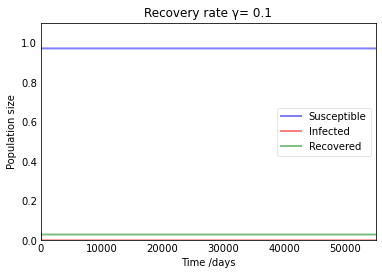

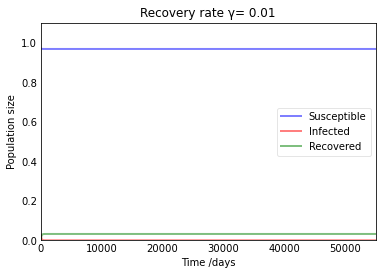

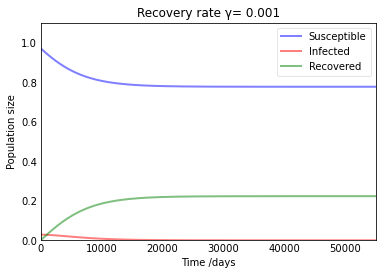

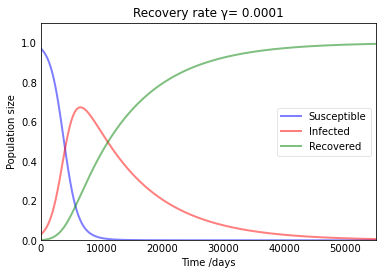

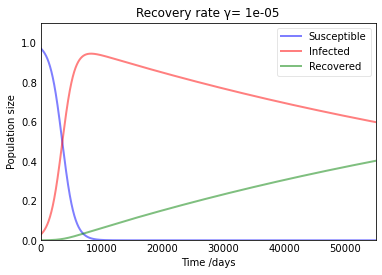

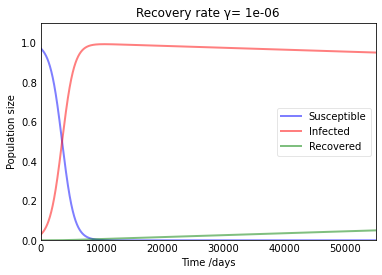

In [3]:
def solve_SIR(g):
    I0 = 17
    R0 = 0
    S0 = 570
    N = S0 + I0 + R0 #total population, N.
    beta = 10**(-3)  #Contact rate, beta
    gamma = 10**(-g) #mean recovery rate, gamma, (in 1/days)

    t = np.linspace(0, 55000, 200000) # A grid of time points (in days)

    # The SIR model differential equations.
    def deriv(y, t, N, beta, gamma):
        S, I, R = y
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - gamma * I
        dRdt = gamma * I
        return dSdt, dIdt, dRdt
    
    y0 = S0, I0, R0 #Initial conditions vector
    ret = odeint(deriv, y0, t, args=(N, beta, gamma)) #Integrate the SIR equations over the time grid, t.
    S, I, R = ret.T

    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, axisbelow=True)
    plt.title("Recovery rate γ= %r" %10**(-g))
    ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Population size')
    ax.set_ylim(0,1.1)
    ax.set_xlim(0,55000)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    plt.show()    
    
for i in np.linspace(1,6,num=6):
    solve_SIR(i)

#### Σχολιασμός SIR

Αρχικα αναφέρουμε πως στο μοντέλο SIR, υπάρχουν δύο παράμετροι το β και το γ. Το β είναι ο ρυθμός επαφής του πληθυσμού και διαισθητικά μπορούμε να θεωρήσουμε ότι υποδηλώνει πόσο γρήγορα αυξάνονται οι Infected και μειώνονται οι Susceptible. Το γ αντίστοιχα είναι ο ρυθμός ανάρρωσης και διαισθητικά υποδηλώνει πόσο γρήγορα αυξάνονται οι Recovered (θεωρουμε ότι αποκτούν ανοσία), ή αντίστοιχα πόσοι από τους Infected παύουν να ανήκουν σε αυτή την κατηγορία.

Παρατηρούμε ότι όταν αρχίζουμε να μελετάμε την επιδιμιολογική μας κατάσταση στο μοντέλο μας έχουμε έναν πληθυσμό 587 ατόμων, με 570 Susceptibles , 17 ηδη Infected και 0 Recovered και έναν ρυθμό μεταδοτικότητας β=0.001. Τέλος όριζεται ένας βασικός ρυθμός ικανότητας του ιου να μεταδοθεί $R_0$ = $β/γ$ για τον οποίο ξέρουμε ότι αν $R_0$ < Ν/$S(0)$ = 1.03 η πανδημία τείνει να εξαφανιστεί.

- γ = 0.1 : $R_0$ = 0.01. Εχούμε χαμηλή ικανότητα μεταδοτικότητας και προφανώς ικανοποιείται η συνθήκη για τον εξαφανισμό της πανδημίας. Παρατηρούμε ότι θα έχουμε ίαση των infected πριν προλάβουν να μεταδώσουν τον ιο σε Susceptible πληθυσμό.

- γ = 0.01 : $R_0$ = 0.1. Ισχύει ακριβώς το ίδιο με την προηγούμενη περίπτωση.

- γ = 0.001 : $R_0$ = 1. Εδω παρατηρούμε ότι αρχικά θα έχουμε μια αύξηση των infected. Αλλά λόγω την συνθήκης $R_0$ < Ν/$S(0)$, δεν θα προλάβει ο ιος να μεταδοθεί αρκετά και σύντομα θα εξαφανιστεί χωρίς να έχει προσβάλει μεγάλο μέρος του πληθυσμού.

- γ = 0.0001 : $R_0$ = 10. Απο εδώ και στο εξής δεν ισχύει η προηγούμενη συνθήκη γεγονός που μας οδηγεί στο να συμπεράνουμε ότι θα προσβληθεί ολόκληρος ο πληθυσμός. Κάθε άτομο θα μεταδώσει τον ιο σε πάνω από 1 άτομο πρωτού από την κατηγορία Infected μεταφερθεί στην κατηγορία Recovered.

- γ = 0.00001 : $R_0$ = 100. Έχουμε πολύ μικρή τιμή στο γ , δηλαδή χαμηλός ρυθμός ανάρρωσης, που ισοδυναμεί με απότομη αύξηση των Infected και μια αρκετά αργή διαδικασία ανάρρωσης.

- γ = 0.000001 : $R_0$ = 1000. Ισχύει ότι ειπώθηκε και στην παραπάνω περίπτωση.

Τέλος να αναφέρουμε ότι σε μια πανδημία συνήθως είναι γνωστό το γ και σταθερό (εκτός αν γίνει κάποια μεγάλη ιατρική ανακάλυψη), δηλαδή ο ρυθμός με τον οποίο ο Infected πλυθυσμός αναρρώνει. Αυτό που μπορούμε να μεταβάλουμε είναι το β με τα αντίστοιχα μέτρα, μείωση του β θα έχει σαν αποτέλεσμα μείωση του $R_0$ , το οποίο οδηγεί σε μια λιγότερο απότομη καμπύλη των Infected.

#### Άσκηση 2: SIS

Για το μοντέλο SIS, υιοθετείται η περίπτωση περιοδικού ρυθμού επαφής κόμβων. Κάτι τέτοιο μπορεί να αντιστοιχεί σε μια περιοδικότητα στη λήψη επιδημιών, πχ. σε ετήσια βάση όπως με τον συνιθισμένο ιό της γρίπης. Το σύνολο των διαφορικών εξισώσεων το οποίο περιγράφει αυτό το μοντέλο είναι:

$\frac{dI}{dt} = (\beta(t)N-a)I - \beta(t)I^2$

$\beta(t) = 2-1.8\cos(5t)$

Για τους συνδυασμούς παραμέτρων που φαίνονται στον ακόλουθο πίνακα, να δείξετε σε κοινό διάγραμμα την εξέλιξη του φαινομένου για κάθε συνδιασμό τιμών ($I(t),\beta(t))$

<table style=width:60%>
<tr>
    <th style=text-align:center>Παράμετροι</th>
    <th style=text-align:center colspan='6'>Τιμές</th>
</tr>
<tr>
    <td style=text-align:center>$\alpha$</td>
    <td style=text-align:center>$6$</td>
    <td style=text-align:center>$5$</td>
    <td style=text-align:center>$4$</td>
    <td style=text-align:center>$3$</td>
    <td style=text-align:center>$2$</td>
    <td style=text-align:center>$1$</td>
</tr>
<tr>
    <td style=text-align:center>$N$</td>
    <td style=text-align:center colspan='6'>$1$</td>
</tr>
</table>

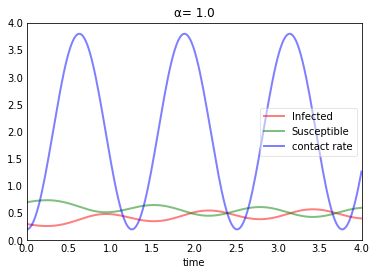

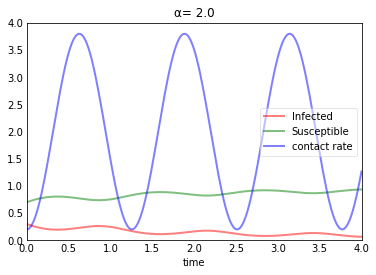

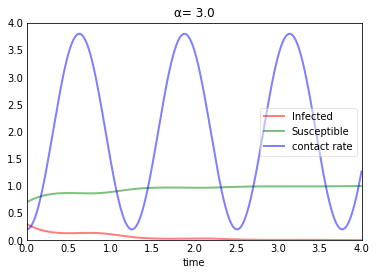

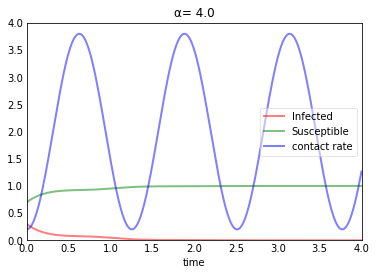

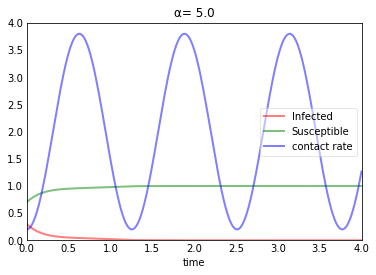

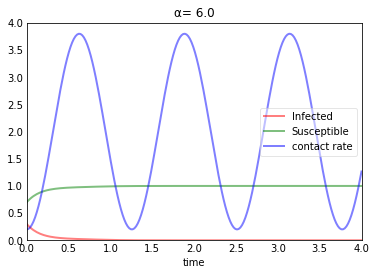

In [4]:
def solve_SIS(g):
    I0 = 0.3
    N = 1 #population percentage
    S0 = N - I0
    alpha = g
    t = np.linspace(0, 4, 200) #time points
    
    def beta(t):
        r = 2 - 1.8*np.cos(5*t);
        return r

    # The SIS model differential equations.
    def deriv(y, t, N, alpha):
        I = y
        dIdt = (beta(t) * N-alpha) * I - beta(t) * (I**2)
        return dIdt
    
    y0 = I0 #Initial conditions vector
    ret = odeint(deriv, y0, t, args=(N, alpha)) #Integrate the SIR equations over the time grid, t.
    I = ret
    
    def susc(N,I):
        s = N-I
        return s
    
    S = susc(N,I)
    
    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig = plt.figure()
    ax = fig.add_subplot(111, axisbelow=True)
    plt.title("α= %r" %g)
    ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, S, 'g', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, beta(t), 'b', alpha=0.5, lw=2, label='contact rate')
    ax.set_xlabel('time')
    ax.set_ylim(0,4)
    ax.set_xlim(0,4)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    plt.show()
    
for i in np.linspace(1,6,num=6):
    solve_SIS(i)

#### Σχολιασμός SIS

Στο μοντέλο αυτό δεν έχουμε κατηγορία Recovered καθώς δεν θεωρούμε ότι υπάρχει ανοσία. Το α στο μοντελο μας υποδηλώνει τον ρυθμο ανάρρωσης του πληθυσμού. Το $\beta(t) = 2-1.8\cos(5t)$ , όπως βλέπουμε είναι περιοδικό και υποδηλώνει τον ρυθμό μετάδοσης που διαφέρει ανάλογα τον χρονο-εποχή.

Συνεπώς στα διαγράμματα η μπλέ καμπύλη είναι το $\beta(t)$.

- α = 1 . Χαμηλός ρυθμός ανάρρωσης και παρατηρούμε ότι στις περιόδους που έχουμε υψηλές τιμές για το β τότε αυξάνονται οι Infected. Επίσης παρατηρούμε ότι σε κάθε εποχή υψηλής μεταδοτικότητας η καμπύλες I(t) και S(t) τείνουν να βρίσκονται πιο κοντά. Αυτό οφείλεται στην εξής συνθήκη. 


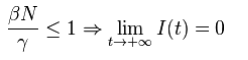


Δηλαδή ολος ο πληθυσμός τείνει να γείνει Infected.


- α = 2,3,4,5,6 . Από εδώ και πέρα θα σχολιάσουμε μαζικά αυτές τις γραφικές παραστάσεις αφού ισχύει το ίδιο. Όσο μεγαλώνει το α τόσο πιο γρήγορα τείνει να εξαλειφθεί παντελώς η πανδημία. Αφού η μέση τιμή του β είναι 2 θα ισχύει το εξής :

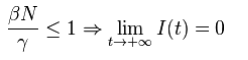.

Μπορεί σε κάθε εποχή υψηλής μεταδοτικότητας να έχουμε μια θετική τιμή για τους Infected (μέχρι να έχουμε πλήρη εξαλειψή). Αλλά είναι τόσο μεγάλος ο αριθμός ανάρρωσης που θα αναρρώσουν άμεσα. Όταν οι Infected γίνουν 0 τότε δεν θα έχουμε εμφάνιση νέου κρούσματος.